In [3]:
import xgboost as xgb

param = {'max_depth': 2, 'eta': 1, 'objective': 'binary:logistic'}
param['nthread'] = 4  # ??

param['eval_metric'] = 'auc'

In [5]:
dtrain = xgb.DMatrix('trainset.svm/part-00000')
dtest = xgb.DMatrix('testset.svm/part-00000')

evallist = [(dtest, 'eval'), (dtrain, 'train')]

[17:44:11] 263703x11 matrix with 2109624 entries loaded from trainset.svm/part-00000
[17:44:11] 113001x11 matrix with 904008 entries loaded from testset.svm/part-00000


# Train and Save model

In [9]:
version = "0001"
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

# After training, the model can be saved.

bst.save_model(f'{version}.model')

# The model and its feature map can also be dumped to a text file.

# dump model with feature map
bst.dump_model(f'dump.raw.{version}.txt')


! ls

[0]	eval-auc:0.912656	train-auc:0.911372
[1]	eval-auc:0.936417	train-auc:0.936791
[2]	eval-auc:0.957589	train-auc:0.957449
[3]	eval-auc:0.959335	train-auc:0.959363
[4]	eval-auc:0.962188	train-auc:0.961726
[5]	eval-auc:0.963372	train-auc:0.962832
[6]	eval-auc:0.963939	train-auc:0.963903
[7]	eval-auc:0.964827	train-auc:0.964719
[8]	eval-auc:0.965094	train-auc:0.964923
[9]	eval-auc:0.965799	train-auc:0.96528
0001.model	   dump.raw.txt		  requirements.txt
datasets	   model_building.ipynb   testset.svm
dump.raw.0001.txt  nyc_inspections.ipynb  trainset.svm


In [12]:
#A saved model can be loaded as follows:

bst = xgb.Booster({'nthread': 4})  # init model
bst.load_model(f'{version}.model')  # load data

# Score All Violation Events

In [70]:
dviolations = xgb.DMatrix('violations.svm/part-00000')
result = bst.predict(dviolations)
lines = open("violations.svm/part-00000").readlines()  # reads newline too

with open("scores.tsv", "w") as f:
    for idx, score in enumerate(result):
        f.write(f"{score}\t")
        f.write(lines[idx])

[18:53:49] 376704x11 matrix with 3013632 entries loaded from violations.svm/part-00000


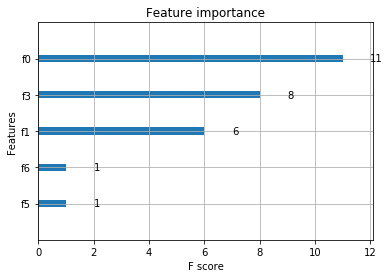

In [68]:
xgb.plot_importance(bst)

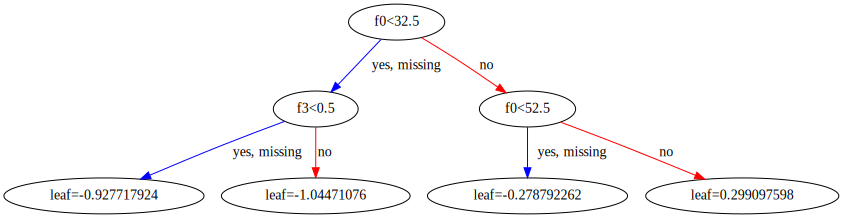

In [71]:
xgb.to_graphviz(bst, num_trees=2)